## Prediccion de seguro de viajes con Python
##### La empresa necesita saber que clientes estarian interesados en comprarlo segn el historial de la base de datos.Los seguros se ofrecieron a algunos de los clientes del 2019 y los datos proporcionados se extrajeron del rendimiento del paquete de entantas durante ese periodo

In [2]:
#Manipulacion y tratamiento de datos

import numpy as np
import pandas as pd

import numpy as np
np.bool = np.bool_

In [73]:
# Visualizacion de datos
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
import seaborn as sns
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

#Balanceo de datos
from imblearn.over_sampling import SMOTE

#Modelos de machine learning
from sklearn.ensemble  import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#Evaluacion de metricas
from sklearn.metrics import classification_report

#Division de Datos e Hiperparametros
from sklearn.model_selection import train_test_split, GridSearchCV

#importar cualquier alerta
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_roc_curve
#from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score

In [4]:
travel=pd.read_csv('TravelInsurancePrediction.csv')

In [5]:
travel.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### Informacion de los datos

Edad: edad del cliente
Tipo de empleo: el sector en que esta empleado el cliente
Graduado o no:si el cliente es graduado universitario o no
Ingreso anual: ingreso anual del cliente
FamilyMembers:numero de miembros de la familia del cliente
Enfermedad cronica: si el cliente sufre de alguna enfermedad importante o condiciones como diabetes, presion arterial alta o asma
Viajero Fecuente: datos derivados del historial de reserva de boletos aéreos del cliente en al menos 4 instancias diferentes en los 2 ultimos años
EverTravelledAbroad: ha viajado alguna vez el cliente en un pais extranjero
TravelInsurance: compro el cliente un paquete de seguro de viaje durante la oferta de lanzamiento celebrada en el 2019



In [6]:
#remeover la columna innecesaria

travel.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


### Analisis exploratorio de los datos 

In [8]:
data_missing_value = travel.isnull().sum().reset_index()
data_missing_value.columns=['feature', 'missing_value']
data_missing_value['percentage']=round((data_missing_value['missing_value']/len(travel))*100)
data_missing_value=data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value=data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


In [9]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [9]:
# en este caso el conjunto de datos no tiene valores perdidos y todas las columnas tienen el tipo de datos correcto
travel.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [10]:
import seaborn as sns

# Select only the numeric columns from the 'travel' DataFrame
numeric_travel = travel.select_dtypes(include=['number'])

# Create the correlation matrix for the numeric columns
correlation_matrix = numeric_travel.corr()


In [11]:
correlation_matrix

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


In [12]:
corr = np.corrcoef(correlation_matrix.T)
corr

array([[ 1.        , -0.39581915, -0.23622127, -0.27022495, -0.30016241],
       [-0.39581915,  1.        , -0.3939607 , -0.35978231,  0.50106661],
       [-0.23622127, -0.3939607 ,  1.        , -0.2313185 , -0.26777624],
       [-0.27022495, -0.35978231, -0.2313185 ,  1.        , -0.39575804],
       [-0.30016241,  0.50106661, -0.26777624, -0.39575804,  1.        ]])

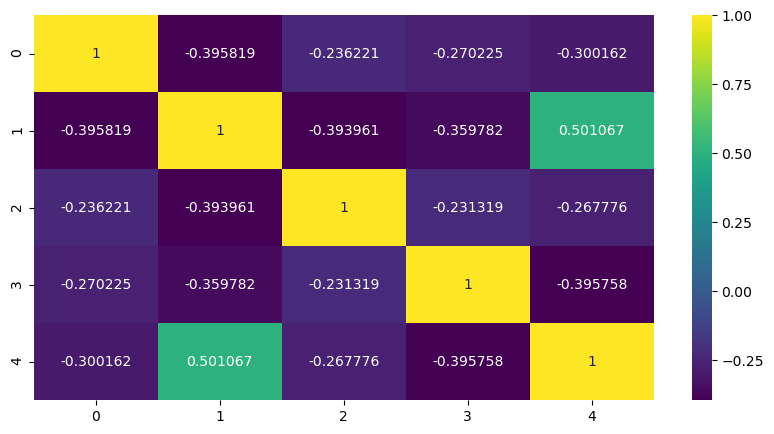

In [13]:
#fig, ax=plt.subplot(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='g', cmap='viridis', cbar=True)
plt.show()


#### Analisis Univariante

In [14]:
fig=px.histogram(travel, 'Age', title='Grafico de Edad', template='plotly_dark')
fig.update_layout(bargap=0.2)
fig.show()

#la mayoria tiene 28 años

In [15]:
%matplotlib inline

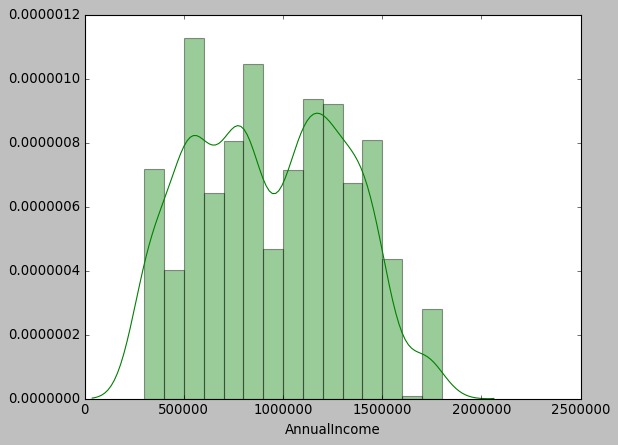

In [16]:
plt.style.use('classic')
#fig, ax =plt.subplot(figsize=(8,6))
sns.distplot(travel['AnnualIncome'], color='g')
plt.show()

#la mayoria de las personas (mas de 140) tienen un ingreso anul de alrededor de 6-8

In [17]:


px.pie(travel, 'Employment Type', title='Distribucion del tipo de empleo de los individuos')

In [18]:

fig = px.pie(
    travel, 
    names='GraduateOrNot', 
    labels={'GraduateOrNot': 'Graduated'}, 
    title='Distribución de los Graduados'
)

fig.show()

In [19]:
fig=px.histogram(travel, 'FamilyMembers', title='Miembro de la familia', template='plotly_dark')
fig.update_layout(bargap=0.2)
fig.show()
#El tamaño de la familia es de 4 miembros

In [20]:
fig = px.pie(travel,
             'ChronicDiseases', 
             title='Distribución de las enfermedades cronicas de las personas',
             template='plotly_dark'
)

fig.show()

In [22]:
fig = px.pie(travel,
             'FrequentFlyer', 
             title='Distribución de las enfermedades cronicas de las personas'
)

fig.show()

In [23]:
fig = px.pie(travel,
             'TravelInsurance', 
             title='Distribución de las personas con seguro de viaje'
)

fig.show()

### Analisis Bivariante y multivariante

In [19]:
fig =px.box(travel,
            y='Age',
            x='TravelInsurance',
            hover_data=travel.columns,
            template='plotly_dark',
            title='Seguro de viaje vs Edad',
            color_discrete_sequence=['forestgreen', 'crimson'])

fig.show()
#las personas que no contratan un seguro de viaje tienen entre 28 y 31 años y las que lo contratan entre 27 y 33 años

In [21]:
pd.crosstab(travel['GraduateOrNot'], columns=travel['TravelInsurance'], normalize='all')
# en este caso el 54% de los graduados no contrata seguro medico, mientras que el 30.7% de los gradudos si lo hace

TravelInsurance,0,1
GraduateOrNot,,
No,0.098641,0.049824
Yes,0.544036,0.307499


In [22]:
pd.crosstab(travel['EverTravelledAbroad'], columns=travel['TravelInsurance'], normalize='all')
#Aproximadamente el 15% de las personas que han viajado al extranjero han contratado seguro y el 4% no
#Ademas la mayoria de las personas son viajeros nacionales el 81%

TravelInsurance,0,1
EverTravelledAbroad,,
No,0.601409,0.207348
Yes,0.041268,0.149975


In [23]:
pd.crosstab(travel['FrequentFlyer'], columns=travel['TravelInsurance'], normalize='all')
#Aproximadamente el 12% de las personas de las personas que son viajeros frecuentes tienen seguro de viaje, mientras que el 9 % no lo tiene
#La mayoria de los clientes no son viajeros frecuentes 79%

TravelInsurance,0,1
FrequentFlyer,,
No,0.553095,0.237041
Yes,0.089582,0.120282


<Axes: xlabel='ChronicDiseases', ylabel='Age'>

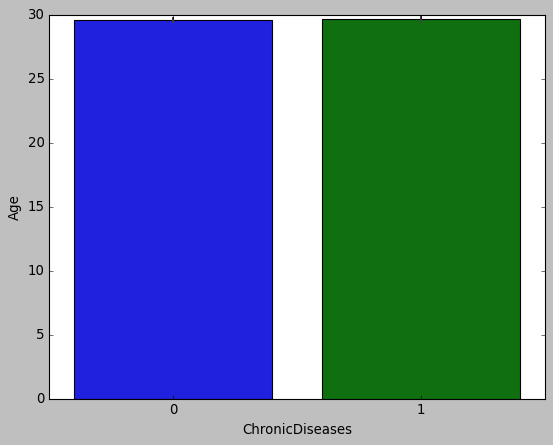

In [24]:
np.float = np.float_
sns.barplot(data=travel, x='ChronicDiseases', y='Age')
#El nivel de presencia y ausencia de enfermedad cronica en personas de todas las edaddes es el mismo

In [25]:
pd.crosstab(travel['Employment Type'], columns=travel['GraduateOrNot'], normalize='all')
#Aproximadamente el 59% y el 26% de las personas

GraduateOrNot,No,Yes
Employment Type,,
Government Sector,0.022144,0.264721
Private Sector/Self Employed,0.126321,0.586814


<Axes: xlabel='Employment Type', ylabel='AnnualIncome'>

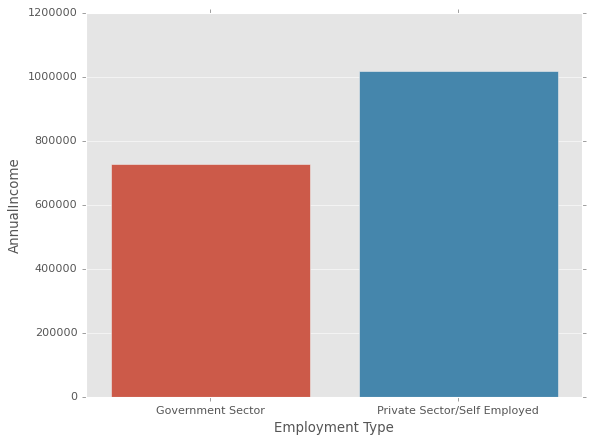

In [25]:
plt.style.use('ggplot')
sns.barplot(x='Employment Type', y='AnnualIncome', data=travel, ci=None)
#Los empleados del sector privado o los autonomos generalmente tienen mas ingresos anuales que los del sector gubernamental

<Axes: xlabel='FrequentFlyer', ylabel='AnnualIncome'>

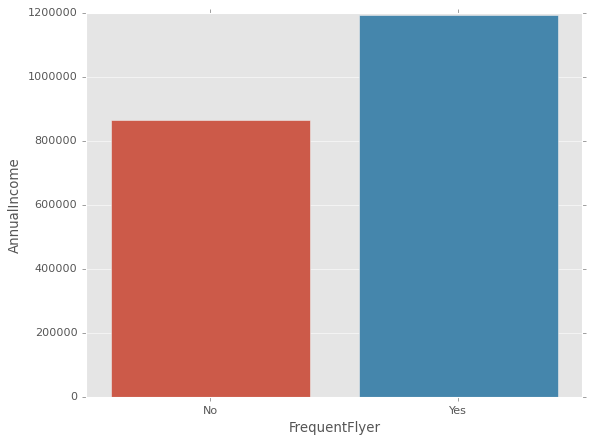

In [26]:
sns.barplot(x='FrequentFlyer', y='AnnualIncome', data=travel, ci=None)

In [27]:
pd.crosstab(travel['Employment Type'], columns=travel['TravelInsurance'], normalize='all')
#Aproximadamente el 29% y el 7 % de las personas que trabajan en empleos privados y gubernamentales tienen seguro de viaje
#el 43% de las personas en el sector privado y el 22% de las personas en el sector gubernamental no tienen seguro de viaje
#el 22% de las personas en el sector gubernamental no tienen seguro de viaje

TravelInsurance,0,1
Employment Type,,
Government Sector,0.216407,0.070458
Private Sector/Self Employed,0.426271,0.286865


In [26]:
#permita que las personas tengan un salario de mas de 8 mil dolares
salary=travel[travel['AnnualIncome']>800000]

In [ ]:
#los empleados privados que tienen ingresos anuales de mas de 8 mil dolares 40% no toman seguro de viaje o el 39% lo toma
#Por tanto los ingresos no pueden ser la razon

In [27]:
pd.crosstab(salary['Employment Type'], columns=salary['TravelInsurance'], normalize='all')

TravelInsurance,0,1
Employment Type,,
Government Sector,0.129208,0.072793
Private Sector/Self Employed,0.404004,0.393995


In [28]:
pd.crosstab(salary['Employment Type'], columns=[salary['TravelInsurance'], salary['FrequentFlyer']], normalize='all')

#Se ve que el 33% de los empleados que tienen ingresos anuales de mas de 8 mil noson viajeros frecuentes por eso "no habian contratado seguro de viaje"

TravelInsurance                     0                   1          
FrequentFlyer                      No       Yes        No       Yes
Employment Type                                                    
Government Sector             0.11192  0.017288  0.047316  0.025478
Private Sector/Self Employed  0.32848  0.075523  0.222020  0.171975

In [29]:
pd.crosstab(travel['ChronicDiseases'], columns=travel['TravelInsurance'], normalize='all')
#eL 17% de las personas que padecen una enfermedad cronica no han contratado seguro de viaje 
# mientras que el 10% de las personas con dicha enfermedad ha contratado seguro de viaje

TravelInsurance,0,1
ChronicDiseases,,
0,0.468042,0.254152
1,0.174635,0.103171


<Axes: xlabel='Employment Type', ylabel='FamilyMembers'>

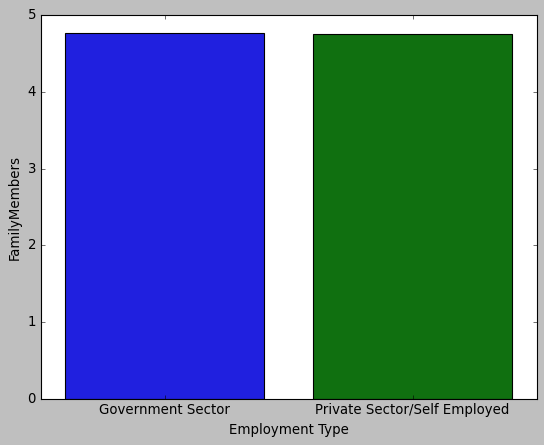

In [30]:
sns.barplot(x='Employment Type', y='FamilyMembers', data=travel, ci=None)

<Axes: xlabel='FamilyMembers', ylabel='AnnualIncome'>

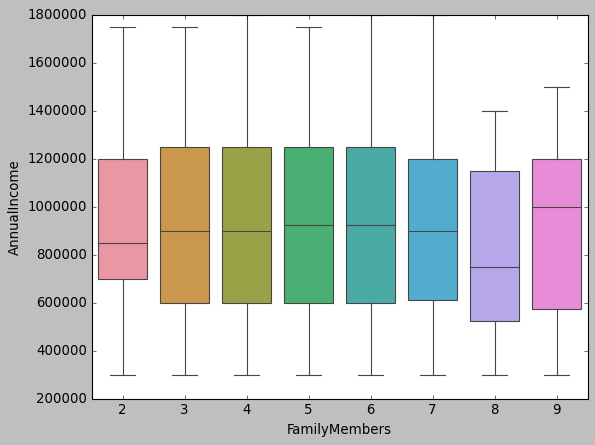

In [31]:
sns.boxplot(y='AnnualIncome', x='FamilyMembers', data=travel)

<Axes: xlabel='GraduateOrNot', ylabel='FamilyMembers'>

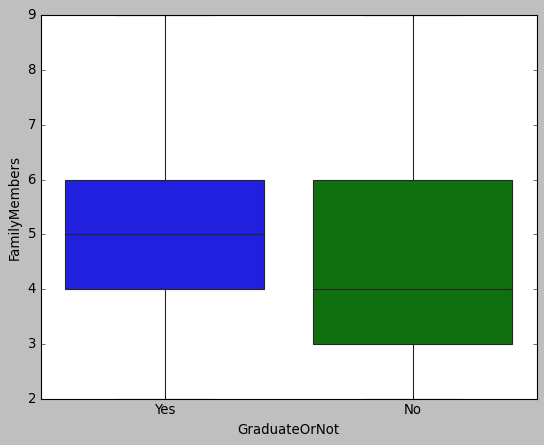

In [32]:
sns.boxplot(x='GraduateOrNot', y='FamilyMembers', data=travel)
#El tamaño de las familias entre 4 y 6 esta formado por miembros graduados
#Los tamaños de familia entre 3 y 6 conisten en miembros que no se graduaron 

### Modelo Balanceado

In [33]:
#Codificacion de Variable

def encondig(feature):
    travel[feature]=travel[feature].replace({'Yes':1, 'No':0})

In [34]:
encondig('GraduateOrNot')
encondig('FrequentFlyer')
encondig('EverTravelledAbroad')


In [ ]:

# Suponiendo que 'travel' es tu DataFrame original
travel = pd.get_dummies(travel, columns=['Employment Type'], drop_first=True)


In [35]:
# Usar replace para mapear categorías a valores numéricos
travel['Employment Type'] = travel['Employment Type'].replace({'Government Sector': 0, 'Private Sector/Self Employed': 1})


In [36]:
# Eliminar la columna "columna_a_eliminar"
travel = travel.drop('Employment Type', axis=1)

In [37]:
travel.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,400000,6,1,0,0,0
1,31,1,1250000,7,0,0,0,0
2,34,1,500000,4,1,0,0,1
3,28,1,700000,3,1,0,0,0
4,28,1,700000,8,1,1,0,0


In [38]:
X=travel.drop(columns=['TravelInsurance'])
y=travel['TravelInsurance']

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y)

In [40]:
#Balanceo de datos

#usando smote para manejar el desequilibrio de clase para la clase minoritaria

over=SMOTE()

In [41]:
#ajuste de smote en el conjunto de entrenamiento y prueba de datos reales sin muetsrear

X_bal, y_bal=over.fit_resample(X_train, y_train)


In [42]:
y_bal.value_counts()

TravelInsurance
0    1021
1    1021
Name: count, dtype: int64

In [78]:
#Contruccion del modelo
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

In [81]:
#Funcion para modelos

def model_fit(model):
    d=model
    d.fit(X_bal, y_bal)
    y_pred=d.predict(X_test)
    acc_reg=accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('**'*30)
    plt.figure(figsize=(5,2))
    plt.title('Matriz de confusion', fontsize=16)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='0f')
    plt.show()
    print('**'*30)
    #plot_roc_curve(d, X_test, y_test)
    svc_disp = RocCurveDisplay.from_estimator (d, X_test, y_test)
    plt.plot([0,1], [0,1], color='darkred', linestyle='--')
    plt.plot()

### Entrenando los modelos

#### 1.Random Forest Clasification

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       256
           1       0.63      0.66      0.64       142

    accuracy                           0.74       398
   macro avg       0.72      0.72      0.72       398
weighted avg       0.74      0.74      0.74       398

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       256
           1       0.63      0.66      0.64       142

    accuracy                           0.74       398
   macro avg       0.72      0.72      0.72       398
weighted avg       0.74      0.74      0.74       398

************************************************************


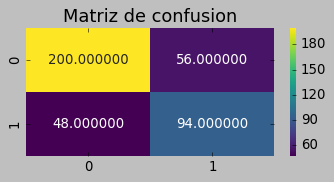

************************************************************


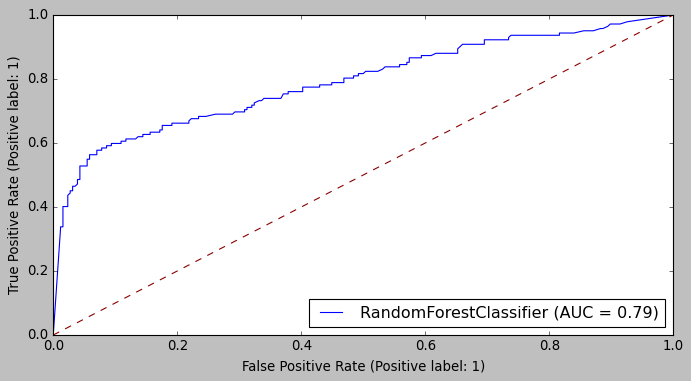

In [82]:
model_fit(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       256
           1       0.87      0.61      0.72       142

    accuracy                           0.83       398
   macro avg       0.84      0.78      0.80       398
weighted avg       0.83      0.83      0.82       398

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       256
           1       0.87      0.61      0.72       142

    accuracy                           0.83       398
   macro avg       0.84      0.78      0.80       398
weighted avg       0.83      0.83      0.82       398

************************************************************


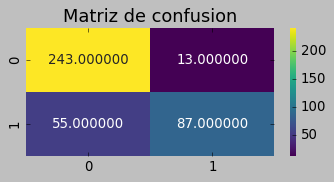

************************************************************


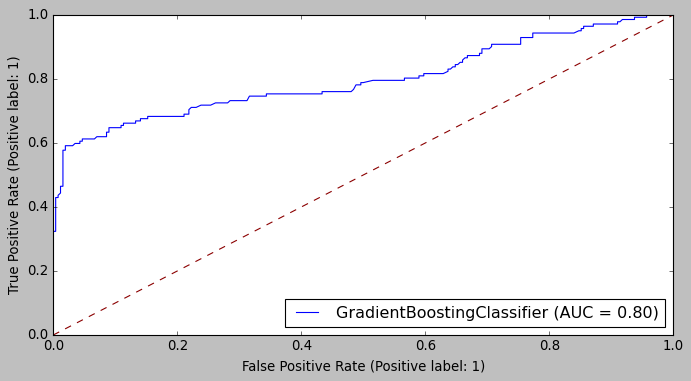

In [84]:
# 2.Gradiente Boosting Clasification

model_fit(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       256
           1       0.63      0.66      0.64       142

    accuracy                           0.74       398
   macro avg       0.72      0.72      0.72       398
weighted avg       0.74      0.74      0.74       398

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       256
           1       0.63      0.66      0.64       142

    accuracy                           0.74       398
   macro avg       0.72      0.72      0.72       398
weighted avg       0.74      0.74      0.74       398

************************************************************


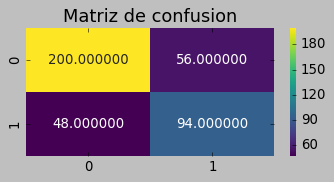

************************************************************


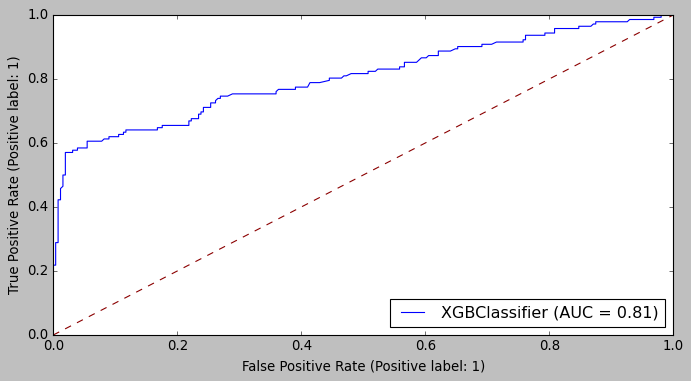

In [85]:
# 3.XGB Classification

model_fit(XGBClassifier())

#### Hyperparameter Tunning Gradiente Boosting Classifier

In [88]:
#parameters

params1={
    'n_estimators':range(100, 300, 5)
}

clf1=GridSearchCV(estimator=GradientBoostingClassifier(random_state=10),
param_grid=params1, scoring='accuracy', n_jobs=-1,cv=5, verbose=3)
clf1.fit(X_bal, y_bal)          

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 300, 5)},
             scoring='accuracy', verbose=3)

In [89]:
print(clf1.best_params_)
print('****' *30)
print(clf1.best_score_)

{'n_estimators': 265}
************************************************************************************************************************
0.786002444987775


In [90]:
clf1.best_estimator_

GradientBoostingClassifier(n_estimators=265, random_state=10)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       256
           1       0.77      0.64      0.70       142

    accuracy                           0.80       398
   macro avg       0.79      0.77      0.78       398
weighted avg       0.80      0.80      0.80       398

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       256
           1       0.77      0.64      0.70       142

    accuracy                           0.80       398
   macro avg       0.79      0.77      0.78       398
weighted avg       0.80      0.80      0.80       398

************************************************************


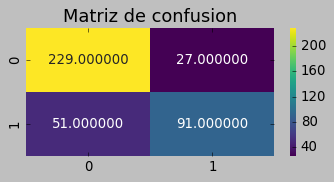

************************************************************


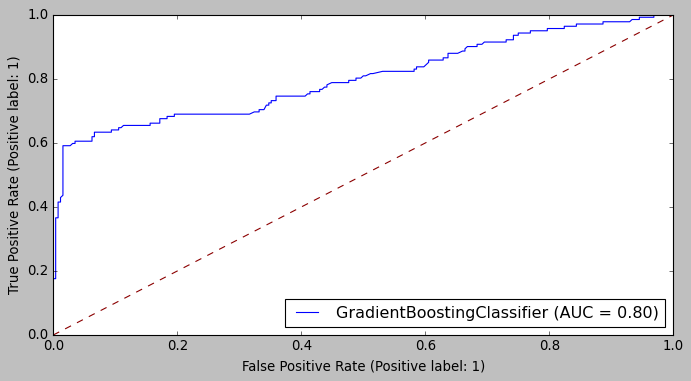

In [91]:
best_model=clf1.best_estimator_
model_fit(best_model)

### Modelo sin balancear los datos

In [92]:
X=travel.drop('TravelInsurance', axis=1)
y=travel['TravelInsurance']
X.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,400000,6,1,0,0
1,31,1,1250000,7,0,0,0
2,34,1,500000,4,1,0,0
3,28,1,700000,3,1,0,0
4,28,1,700000,8,1,1,0


In [93]:
len(X_train), len(X_test)

(1589, 398)

### Entenando los modelos
### 1.Random Forest Clasification

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [95]:
#Entrenando el Modelo
rf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
RandomForestClassifierScore=rf.score(X_test, y_test)
RandomForestClassifierScore

0.7839195979899497

In [97]:
print('El Accuracy obtenido para el modelo de RandomForestClassifier es:', round(RandomForestClassifierScore*100,4))

El Accuracy obtenido para el modelo de RandomForestClassifier es: 78.392


### 2.Regresion Logistica

In [98]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [99]:
lr.fit(X_train, y_train)

LogisticRegression()

In [100]:
LogisticRegressionScore=lr.score(X_test, y_test)
LogisticRegressionScore

0.6432160804020101

In [101]:
print('El Accuracy obtenido para el modelo de RegrsionLogistica es:', round(LogisticRegressionScore*100,4))

El Accuracy obtenido para el modelo de RegrsionLogistica es: 64.3216


### 3. KNeighbors Clasification

In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [103]:
KNeighborsClassifierScore=knn.score(X_test, y_test)
KNeighborsClassifierScore

0.8190954773869347

In [104]:
print('El Accuracy obtenido para el modelo de KNeighbors es:', round(KNeighborsClassifierScore*100,4))

El Accuracy obtenido para el modelo de KNeighbors es: 81.9095


### 4.CatBoost Clasificación

In [106]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5447423	total: 171ms	remaining: 1.54s
1:	learn: 0.4991944	total: 173ms	remaining: 692ms
2:	learn: 0.4758503	total: 175ms	remaining: 407ms
3:	learn: 0.4592315	total: 176ms	remaining: 264ms
4:	learn: 0.4518507	total: 178ms	remaining: 178ms
5:	learn: 0.4435093	total: 179ms	remaining: 119ms
6:	learn: 0.4382657	total: 181ms	remaining: 77.4ms
7:	learn: 0.4303069	total: 182ms	remaining: 45.5ms
8:	learn: 0.4269905	total: 183ms	remaining: 20.4ms
9:	learn: 0.4235827	total: 185ms	remaining: 0us


In [107]:
CatBoostClassifierScore=cat.score(X_test, y_test)
print('El Accuracy obtneido para el modelo CatBoost Classifier es:', round(CatBoostClassifierScore*100,4))

El Accuracy obtneido para el modelo CatBoost Classifier es: 84.6734


### 6. Gradient Boosting Clasificacion



In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [110]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [111]:
GradientBoostingClassifierScore=gb.score(X_test, y_test)
print('El Accuracy obtenido para el modelo Gradient Boosting es:', round(GradientBoostingClassifierScore*100, 4)) #

El Accuracy obtenido para el modelo Gradient Boosting es: 83.4171


### Comparando modelos

In [118]:
plt.style.use('classic')
x=['LogisticRegression',
   #'Decision Tree Classifier',
   'RandomForestClassifier',
   'KNeighborsClassifier',
   'CatBoost Classifier',
   'Gradient Boosting Classifier']
y=[LogisticRegressionScore,
   #DecisionTreeClassifierScore,
   RandomForestClassifierScore,
   KNeighborsClassifierScore,
   CatBoostClassifierScore,
   GradientBoostingClassifierScore]

Text(0.5, 1.0, 'Model Comparison - Model Accuracy')

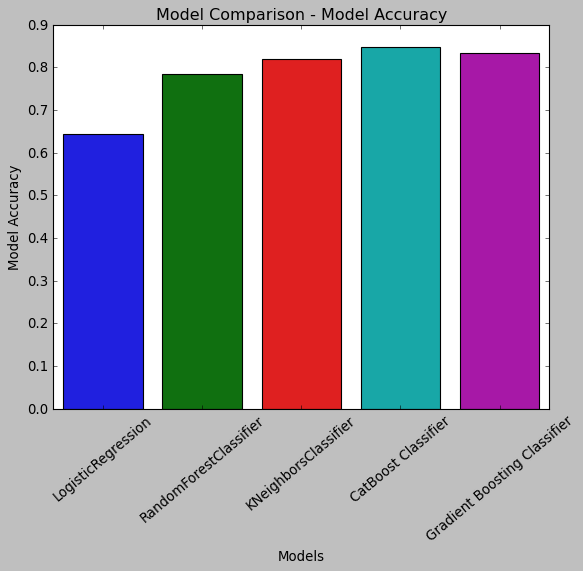

In [120]:
fig, ax =plt.subplots(figsize=(8,6))
sns.barplot(x=x, y=y)
plt.xlabel('Models')
plt.ylabel('Model Accuracy')
plt.xticks(rotation=40)
plt.title('Model Comparison - Model Accuracy')


### Hyperparameter Tunning on Random Forest Classifier

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'bootstrap':[True],
    'max_depth':[80, 90, 100, 110, 120],
    'max_features': [2,3],
    'min_samples_leaf': [3,4,5],
    'min_samples_split':[8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

In [123]:
grid_search_rf=GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [124]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110, 120],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [125]:
grid_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [126]:
grid_search_rf.best_score_

0.8313276503667772

In [127]:
grid_search_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=80, max_features=2,
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=300)

### Mejor Modelo

In [128]:
best_model=grid_search_rf.best_estimator_

In [133]:
def model_grid(model):
    d=model
    d.fit(X_train, y_train)
    y_pred=d.predict(X_test)
    acc_reg=accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print('**'*30)
    print(f'Accuracy Score : {acc_reg}')
    print ('**'*30)
    plt.figure(figsize=(5,2))
    plt.title('Matriz de Confusión', fontsize=16)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt= '.0f')
    plt.show()
    print ('**'*30)
    #plot_roc_curve(d, X_test, y_test)
    svc_disp = RocCurveDisplay.from_estimator (d, X_test, y_test)
    plt.plot([0,1], [0,1], color='darkred', linestyle='--')
    plt.show()
    

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       256
           1       0.95      0.61      0.74       142

    accuracy                           0.85       398
   macro avg       0.88      0.80      0.82       398
weighted avg       0.86      0.85      0.84       398

************************************************************
Accuracy Score : 0.8492462311557789
************************************************************


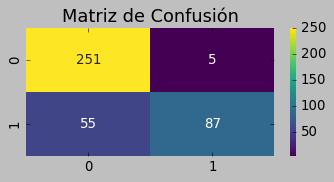

************************************************************


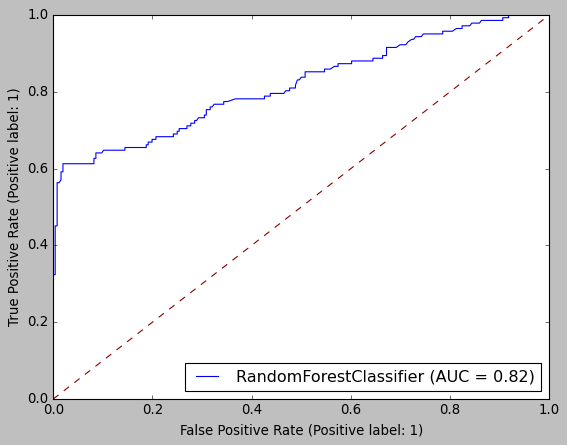

In [134]:
model_grid(best_model)